In [1]:
from sklearn.model_selection import train_test_split # importa a biblioteca
# para dividir os dados em treino e teste
import numpy as np # biblioteca para trabalhar com arrays
from sklearn.tree import DecisionTreeClassifier # importa o modelo 
#arvore de decisão
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns # importa biblioteca seaborn para plotar gráficos
from sklearn import tree # importa a biblioteca tree da biblioteca sklearn

In [3]:
# criando a base de dados
data = pd.DataFrame({
    'idade':[2,6,1,4,3,5],
    'hist_m':['bom','ruim','excelente','regular','excelente','regular'],
    'falhas':[0,2,0,1,3,2],
    'classif':['segura','não segura','segura','não segura','segura',
               'não segura']
})

Acurácia: 1.0
Precisão: 1.0


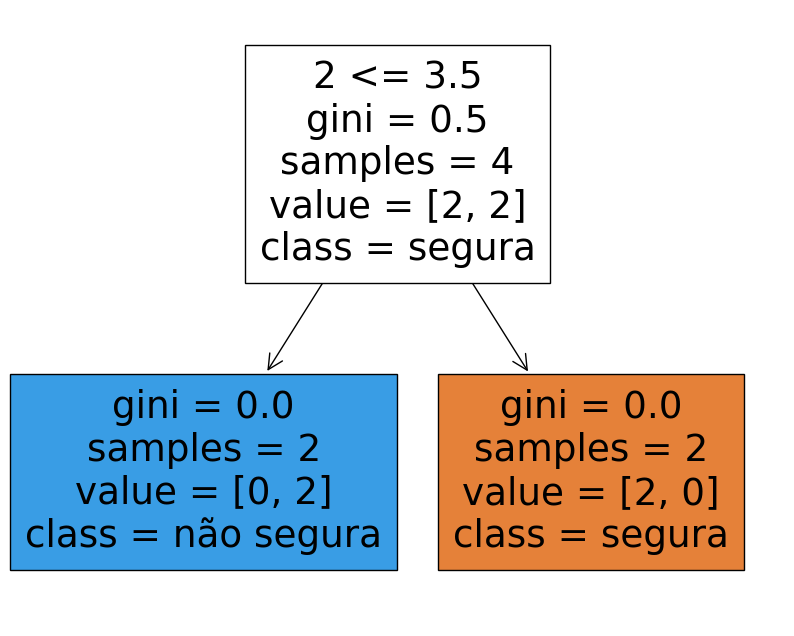

In [5]:
x=np.array(data['idade']) # pega a coluna de tempo do dataframe
y=np.array(data['classif']) # pega a coluna de classificação do dataframe 
x_treino,x_teste,y_treino,y_teste = train_test_split(x.reshape(-1,1),y.reshape(-1,1),
                                                     test_size=0.2,random_state=42)
model = DecisionTreeClassifier()
model.fit(x_treino,y_treino)
prev = model.predict(x_teste)
acurracy = accuracy_score(y_teste,prev)
precisao = precision_score(y_teste,prev,pos_label='segura') # pós label rótulo
matrix = confusion_matrix(y_teste,prev)
print(f'Acurácia: {acurracy}')
print(f'Precisão: {precisao}')
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model,feature_names=x.tolist(),class_names=y.tolist(),filled=True)
plt.show()

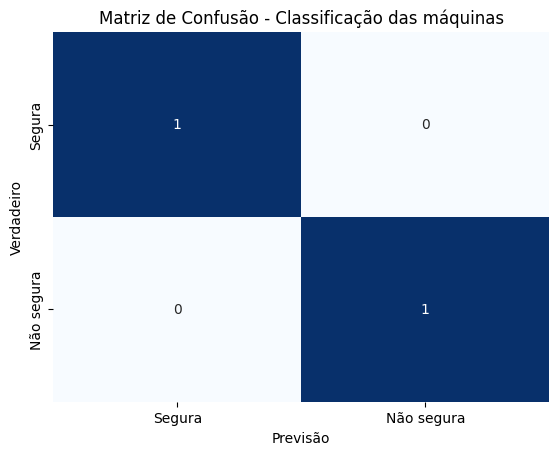

In [7]:
sns.heatmap(matrix,annot= True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Segura','Não segura'],yticklabels=['Segura','Não segura'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação das máquinas')
plt.show()